In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, SimpleRNN, LSTM
import matplotlib.pyplot as plt

In [8]:
from sklearn.datasets import load_linnerud

linnerud = load_linnerud()
print(linnerud.DESCR)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



In [9]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [10]:
df = pd.concat([pd.DataFrame(linnerud.data, columns=linnerud.feature_names),
                pd.DataFrame(linnerud.target, columns=linnerud.target_names)],
               axis=1)
df.tail()

,Chins,Situps,Jumps,Weight,Waist,Pulse
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


In [11]:
df

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [12]:
y = df.Pulse.values
x = df.drop(columns=['Pulse']).values

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=423)

In [14]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(5,)),  # 입력 레이어를 5차원으로 수정
    tf.keras.layers.Dense(units=1)  # 출력 레이어
])


optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)  # 학습률을 조정
model.compile(optimizer=optimizer, loss='mean_squared_error')


model.fit(X_train, y_train, epochs=5, verbose=1)

model.summary()

Epoch 1/5
1/1 [==============================] - 0s 217ms/step - loss: 18270.0469
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 274433856.0000
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 4311734026240.0000
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 67749630170890240.0000
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 1064539980400817078272.0000
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# 모델을 사용하여 예측 수행
y_pred = model.predict(X_test)

# 예측 결과 출력
print("예측 결과:", y_pred)


1/1 [==============================] - 0s 53ms/step
예측 결과: [[-3.4164803e+12]
 [-4.6221943e+12]
 [-3.6578536e+12]
 [-3.1780469e+12]]


In [16]:
# 모델 평가
loss = model.evaluate(X_test, y_test)
print("평가 손실 (MSE):", loss)


1/1 [==============================] - 0s 82ms/step - loss: 14129223671339591504232448.0000
평가 손실 (MSE): 1.4129223671339592e+25


Epoch 1/100
1/1 [==============================] - 1s 548ms/step - loss: 14034.9902 - val_loss: 11073.2686
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 12271.3789 - val_loss: 9613.5654
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 10675.0400 - val_loss: 8301.8555
Epoch 4/100
1/1 [==============================] - 0s 25ms/step - loss: 9245.5547 - val_loss: 7159.0869
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 7968.6514 - val_loss: 6140.1250
Epoch 6/100
1/1 [==============================] - 0s 28ms/step - loss: 6821.9199 - val_loss: 5228.2373
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 5787.4482 - val_loss: 4410.2388
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 4868.8086 - val_loss: 3698.0735
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 4071.9937 - val_loss: 3065.9456
Epoch 10/100
1/1 [==============================] - 0s 24ms

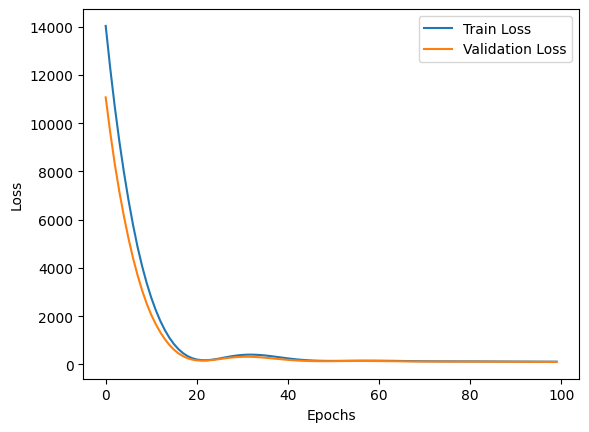

In [17]:
from keras.models import Sequential
# 1D Convolutional Neural Network 모델
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')


X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=16, validation_data=(X_test_reshaped, y_test))


y_pred = model.predict(X_test_reshaped)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Epoch 1/100
1/1 [==============================] - 1s 867ms/step - loss: 5413.4907 - val_loss: 4107.6489
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 4694.7505 - val_loss: 3469.7217
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 3965.0789 - val_loss: 2863.1384
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 3262.9661 - val_loss: 2332.3110
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 2640.5120 - val_loss: 1853.2318
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 2109.4707 - val_loss: 1451.3287
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 1668.3893 - val_loss: 1109.0101
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 1294.8760 - val_loss: 817.3156
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 982.2067 - val_loss: 589.0229
Epoch 10/100
1/1 [==============================] - 0s 24ms/step -

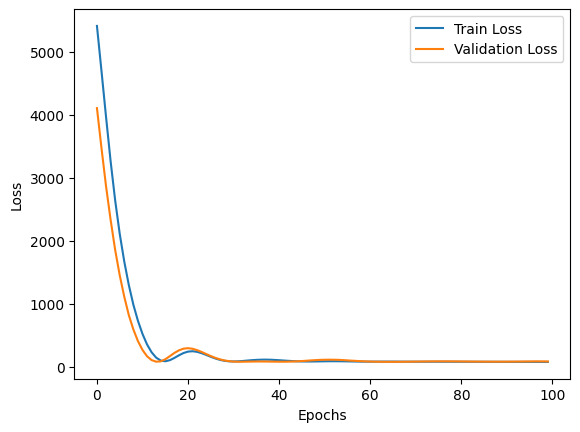

In [18]:
# RNN 모델 생성
model = Sequential()
model.add(SimpleRNN(64, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')


X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=16, validation_data=(X_test_reshaped, y_test))


y_pred = model.predict(X_test_reshaped)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 3031.1274 - val_loss: 2537.7363
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 2794.9365 - val_loss: 2342.0769
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 2579.4785 - val_loss: 2164.2725
Epoch 4/100
1/1 [==============================] - 0s 25ms/step - loss: 2378.4292 - val_loss: 1997.7700
Epoch 5/100
1/1 [==============================] - 0s 26ms/step - loss: 2189.2705 - val_loss: 1844.6863
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 2010.8138 - val_loss: 1697.2637
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 1841.5848 - val_loss: 1553.8564
Epoch 8/100
1/1 [==============================] - 0s 26ms/step - loss: 1676.9946 - val_loss: 1411.5486
Epoch 9/100
1/1 [==============================] - 0s 26ms/step - loss: 1514.0739 - val_loss: 1270.1779
Epoch 10/100
1/1 [==============================] - 0s 28ms/step -

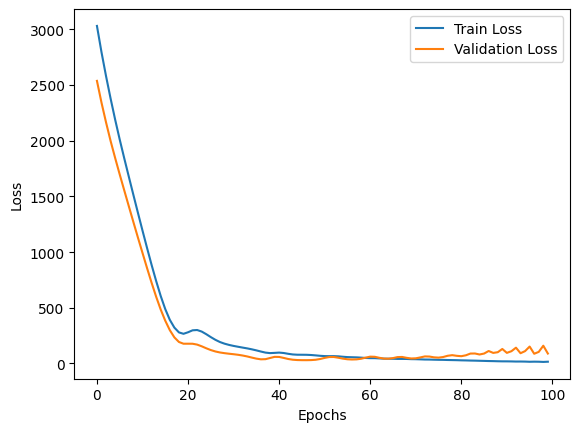

In [19]:
# LSTM 모델
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')


X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 모델 학습
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=16, validation_data=(X_test_reshaped, y_test))

# 모델 평가
y_pred = model.predict(X_test_reshaped)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 학습 곡선 그리기
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
